In [62]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import datetime
from statistics import mean

In [55]:
with open("./optimizer_results_thorton/result.csv", "r", encoding = "ISO-8859-1") as f:
    reader = csv.DictReader(f)
    optimizer_trip_list = list(reader)

optimizer_date_data = defaultdict(list)

for trip in optimizer_trip_list:
    date = datetime.datetime.strptime(trip['real_start'], "%Y-%m-%d %H:%M:%S").date()
    optimizer_date_data[date].append(trip)
# del optimizer_date_data[datetime.datetime(2021,2,20).date()]

with open("./optimizer_results_thorton/result_original.csv", "r", encoding = "ISO-8859-1") as f:
    reader = csv.DictReader(f)
    original_trip_list = list(reader)

original_date_data = defaultdict(list)

for trip in original_trip_list:
    date = datetime.datetime.strptime(trip['real_start'], "%Y-%m-%d %H:%M:%S").date()
    original_date_data[date].append(trip)

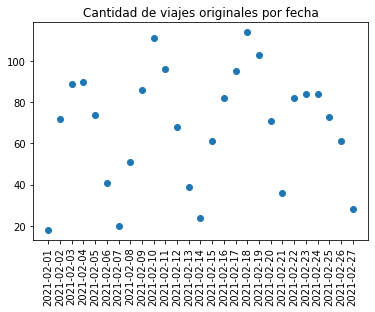

In [56]:
trips_data = [(k, len(v)) for k, v in original_date_data.items()]
plt.scatter([a[0] for a in trips_data], [a[1] for a in trips_data])
plt.title("Cantidad de viajes originales por fecha")
plt.xticks([a[0] for a in trips_data], rotation=90)
plt.show()

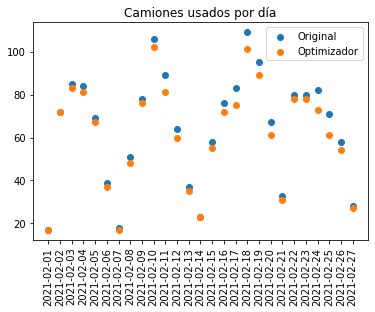

In [57]:
original_trucks_amount = {(k, len(set([a['unidad'] for a in v]))) for k, v in original_date_data.items()}
optimizer_trucks_amount = {(k, len(set([a['unidad'] for a in v]))) for k, v in optimizer_date_data.items()}
dates = [a[0] for a in sorted(original_trucks_amount)]
plt.scatter([a[0] for a in original_trucks_amount], [a[1] for a in original_trucks_amount])
plt.scatter([a[0] for a in optimizer_trucks_amount], [a[1] for a in optimizer_trucks_amount])
plt.legend(['Original', 'Optimizador'])
plt.title("Camiones usados por día")
plt.xticks([a[0] for a in original_trucks_amount], rotation=90)
plt.show()

In [58]:
max_trucks = [a[1] for a in sorted(original_trucks_amount)]
absolute_growth = [a - b for a, b in zip(max_trucks, [a[1] for a in sorted(optimizer_trucks_amount)])]
relative_growth = [b * 100 / a if b > 0 else 0 for a, b in zip(max_trucks, absolute_growth)]
print(relative_growth)


[0, 0, 2.3529411764705883, 3.5714285714285716, 2.898550724637681, 5.128205128205129, 5.555555555555555, 5.882352941176471, 2.5641025641025643, 3.7735849056603774, 8.98876404494382, 6.25, 5.405405405405405, 0, 5.172413793103448, 5.2631578947368425, 9.63855421686747, 7.339449541284404, 6.315789473684211, 8.955223880597014, 6.0606060606060606, 2.5, 2.5, 10.975609756097562, 14.084507042253522, 6.896551724137931, 3.5714285714285716]


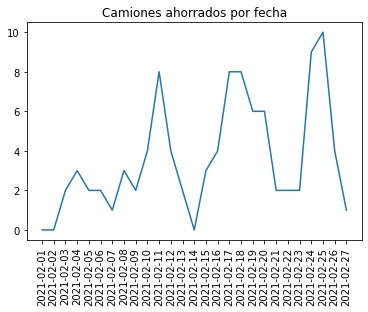

In [59]:
plt.plot(dates, absolute_growth)
plt.title("Camiones ahorrados por fecha")
plt.xticks(dates, rotation=90)
plt.show()

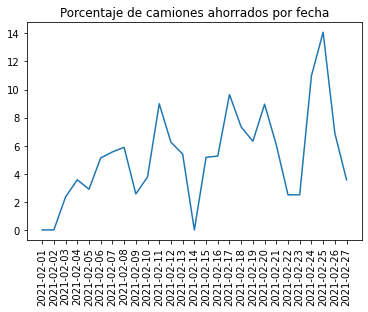

In [60]:
plt.plot(dates, relative_growth)
plt.title("Porcentaje de camiones ahorrados por fecha")
plt.xticks(dates, rotation=90)
plt.show()

In [77]:
print(f"Porcentaje máximo de camiones ahorrado en un día: {int(max(relative_growth))}%")
print(f"Cantidad de camiones máxima ahorrado en un día: {int(max(absolute_growth))}")
print(f"Promedio de optimización por día: {round(mean(relative_growth), 2)}")
print(f"Camiones ahorrados en total durante un mes: {sum(absolute_growth)}")

Porcentaje máximo de camiones ahorrado en un día: 14%
Cantidad de camiones máxima ahorrado en un día: 10
Promedio de optimización por día: 5.25
Camiones ahorrados en total durante un mes: 98


In [66]:
with open("./optimizer_results_thorton/result_original.csv", "r", encoding = "ISO-8859-1") as f:
    reader = csv.DictReader(f)
    original_trip_list = list(reader)

original_date_data_thorton = defaultdict(list)
units_list = set()
unidades_discovered_per_date = defaultdict(int)

for trip in original_trip_list:
    date = datetime.datetime.strptime(trip['real_start'], "%Y-%m-%d %H:%M:%S").date()
    if trip['tipo_unidad'] == 'Thorton':
        original_date_data_thorton[date].append(trip)
        if trip['unidad'] not in units_list:
            units_list.add(trip['unidad'])
            unidades_discovered_per_date[date] += 1

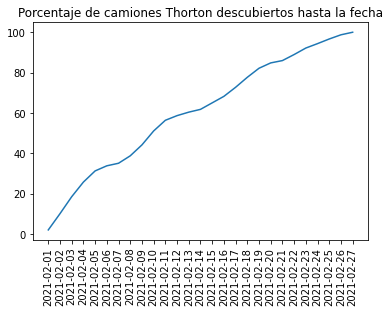

In [67]:
percentage_per_day = [unidades_discovered_per_date[k]*100/len(units_list) for k in sorted(unidades_discovered_per_date.keys())]
percentage_per_day_cumul = []
total = 0
for a in percentage_per_day:
    total += a
    percentage_per_day_cumul.append(total)


plt.plot(dates, percentage_per_day_cumul, label="Camiones descubiertos del total")
plt.title("Porcentaje de camiones Thorton descubiertos hasta la fecha")
# plt.legend(loc='best')
plt.xticks(dates, rotation=90)
plt.show()